# ECS 171 Group Project - Group 10 - ???

## Clean/Wrangle Data

"Process the data the same way the paper author did"

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import pandas as pd


pd.options.display.max_columns = 999

#Contains 81 features extracted from 21263 superconductors along with the critical temperature in the 82nd column
train = pd.read_csv('./../superconduct/train.csv')

#Contains the chemical formula broken up for all the 21263 superconductors from the train.csv file.
#The last two columns have the critical temperature and chemical formula.
formula = pd.read_csv('./../superconduct/unique_m.csv')

print("Training Data")
print(train.shape)
print(train.head())

print("\nChemical formulas")
print(formula.shape)
print(formula.head())

Training Data
(21263, 82)
   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755    

## Reference Neural Network

In [126]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

trainx = train.drop("critical_temp",axis=1)
trainy = train['critical_temp']

train_X, test_X, train_y, test_y = train_test_split(trainx,trainy, train_size=0.7, random_state=1)

sc = MinMaxScaler()

train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

nn = Sequential(
    [
        keras.Input(shape=train_X.shape[1]),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ]
)

nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), 
           loss="mean_squared_error",
           metrics=[keras.metrics.MeanSquaredError()])

history = nn.fit(train_X, train_y, batch_size=64, epochs=100, verbose=0)

pred = nn.predict(train_X)

print(history.history['mean_squared_error'])

[721.35791015625, 348.6507568359375, 302.7518005371094, 284.4790954589844, 274.09405517578125, 274.3393249511719, 270.18310546875, 262.2406921386719, 265.1776123046875, 262.39544677734375, 255.61349487304688, 256.6683349609375, 257.85992431640625, 251.8751983642578, 256.1516418457031, 250.631591796875, 247.85731506347656, 246.06069946289062, 246.42811584472656, 248.7205047607422, 243.99610900878906, 244.24740600585938, 245.14515686035156, 237.561279296875, 238.1957244873047, 236.60610961914062, 238.15196228027344, 236.9551239013672, 232.66416931152344, 232.19894409179688, 231.35110473632812, 231.9741668701172, 231.1882781982422, 233.45809936523438, 230.55003356933594, 224.26316833496094, 225.02076721191406, 222.40219116210938, 232.1301727294922, 224.0738525390625, 219.76812744140625, 222.2906036376953, 222.38438415527344, 223.21417236328125, 214.31613159179688, 222.4661407470703, 216.80520629882812, 216.32835388183594, 220.66168212890625, 215.8970184326172, 216.97344970703125, 223.7162

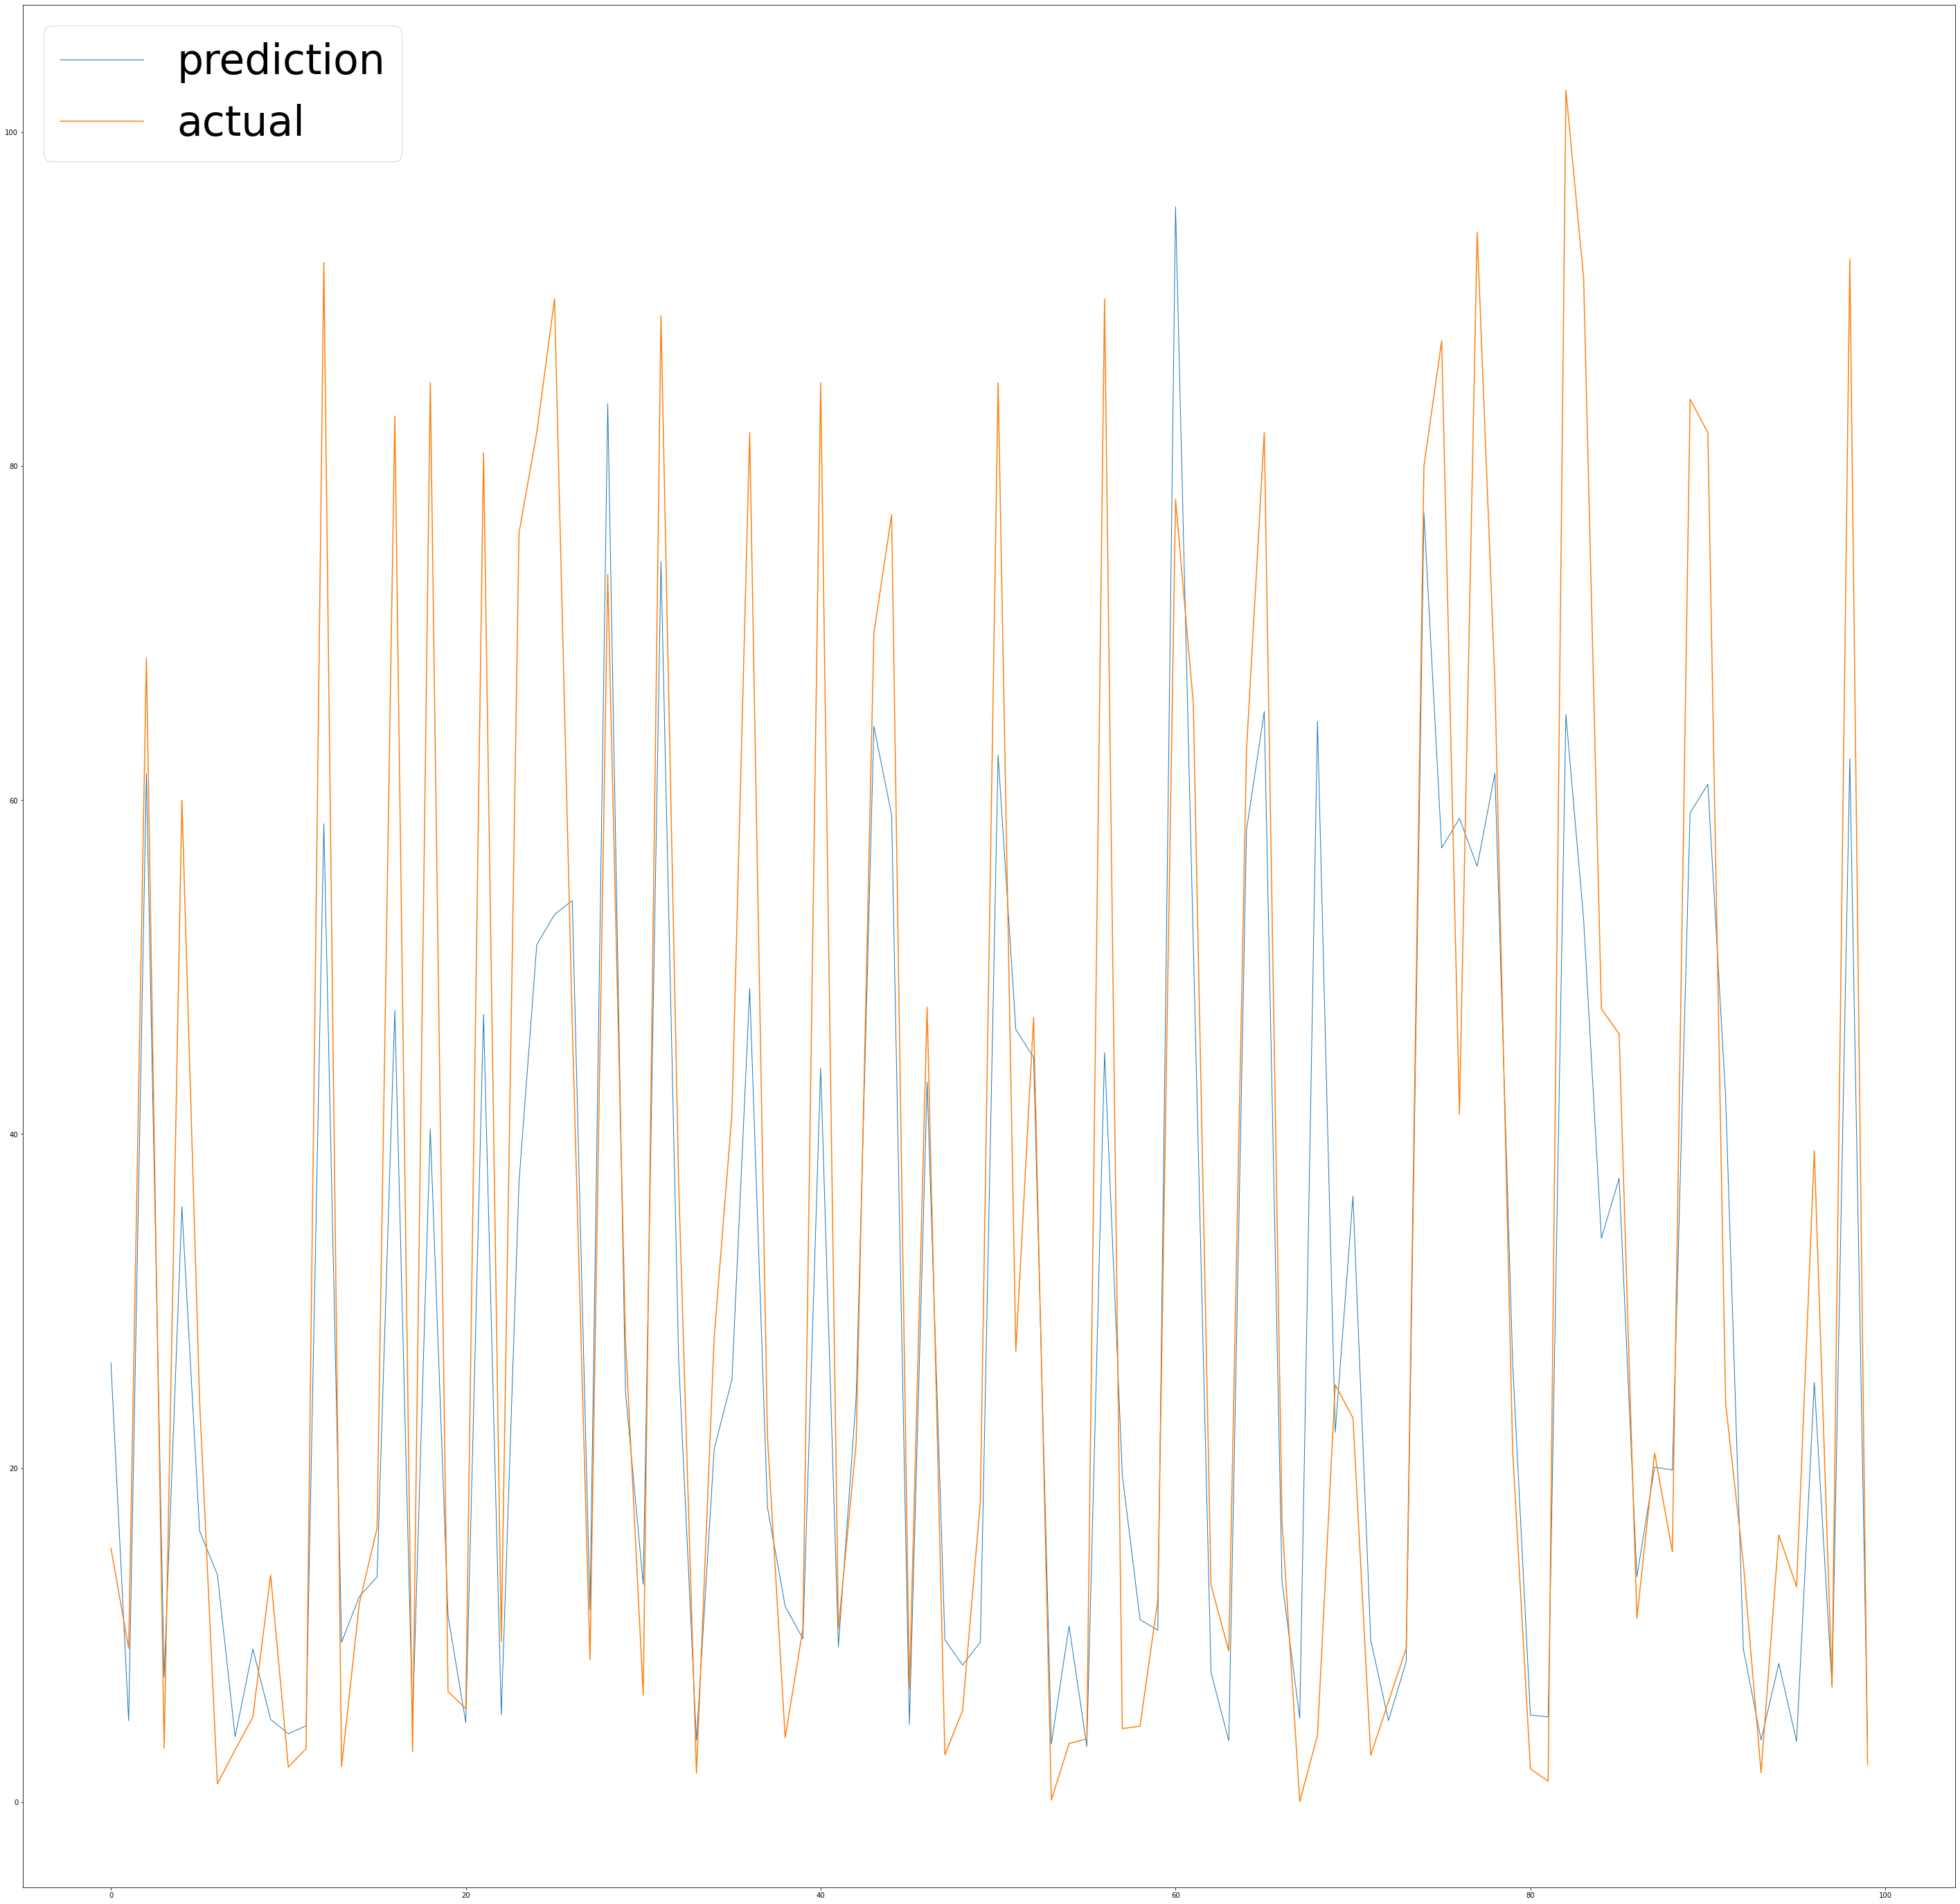

In [127]:
import matplotlib.pyplot as plt

# showing graph with first 100 values
plt.figure(figsize=(50,50))
line1 = plt.plot(range(100), pred[:100],linewidth=1, label='prediction')
line2 = plt.plot(range(100), train_y[:100], label='actual')
plt.legend(loc="upper left", prop={'size': 60})

In [128]:
# source https://www.pyimagesearch.com/2019/01/21/regression-with-keras/
diff = pred.flatten() - train_y
percent_diff = (diff/train_y)*100
abs_percent_diff = np.abs(percent_diff)
mean = np.mean(abs_percent_diff)
std = np.std(abs_percent_diff)
print("Mean Abs. Percent Diff: " + str(mean))
print("Std. Deviation        : " + str(std))

Mean Abs. Percent Diff: 737.6650671247936
Std. Deviation        : 31308.639202546663


## Replicate original XGBoost model

## Optimize XGBoost model with tuned hyperparameters

## Train and test a Random Forest model

## Optimize Random Forest model with tuned hyperparameters

## Research Bayesian Neural Networks
## Train and test a Bayesian Neural Network

## Optimize Bayesian Neural Network with tuned hyperparameters

## Analyze all model results and performances

## Frontend?